<a href="https://colab.research.google.com/github/MawadaMF/MKT566/blob/main/566_merged_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import math
from sklearn import cluster
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Transcript CSV

In [114]:
transcript = pd.read_csv('/content/drive/MyDrive/MKT 566 Project/transcript.csv',index_col=0)
transcript = transcript.rename(columns={'person': 'id'})
transcript.head()


,id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [115]:
transcript.shape

(306534, 4)

In [116]:
test = transcript['value'].str.split(':', expand=True)
test.head()

,0,1,2
0,{'offer id','9b98b8c7a33c4b65b9aebfe6a799e6d9'},None
1,{'offer id','0b1e1539f2cc45b7b9fa7c272da2e1d7'},None
2,{'offer id','2906b810c7d4411798c6938adc9daaa5'},None
3,{'offer id','fafdcd668e3743c1bb461111dcafc2a4'},None
4,{'offer id','4d5c57ea9a6940dd891ad53e9dbe8da0'},None


In [117]:
test.values

array([["{'offer id'", " '9b98b8c7a33c4b65b9aebfe6a799e6d9'}", None],
       ["{'offer id'", " '0b1e1539f2cc45b7b9fa7c272da2e1d7'}", None],
       ["{'offer id'", " '2906b810c7d4411798c6938adc9daaa5'}", None],
       ...,
       ["{'amount'", ' 3.61}', None],
       ["{'amount'", ' 3.5300000000000002}', None],
       ["{'amount'", ' 4.05}', None]], dtype=object)

In [118]:
test.drop(test.index[test[0] == "{'amount'"], inplace=True)
test.values

array([["{'offer id'", " '9b98b8c7a33c4b65b9aebfe6a799e6d9'}", None],
       ["{'offer id'", " '0b1e1539f2cc45b7b9fa7c272da2e1d7'}", None],
       ["{'offer id'", " '2906b810c7d4411798c6938adc9daaa5'}", None],
       ...,
       ["{'offer id'", " '0b1e1539f2cc45b7b9fa7c272da2e1d7'}", None],
       ["{'offer_id'", " 'fafdcd668e3743c1bb461111dcafc2a4', 'reward'",
        ' 2}'],
       ["{'offer_id'", " 'fafdcd668e3743c1bb461111dcafc2a4', 'reward'",
        ' 2}']], dtype=object)

In [119]:
x = test[1].str[:-1]

In [120]:
transcript['offer id']= x
transcript.head()

,id,event,value,time,offer id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,'9b98b8c7a33c4b65b9aebfe6a799e6d9'
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,'0b1e1539f2cc45b7b9fa7c272da2e1d7'
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,'2906b810c7d4411798c6938adc9daaa5'
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,'fafdcd668e3743c1bb461111dcafc2a4'
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,'4d5c57ea9a6940dd891ad53e9dbe8da0'


In [121]:
transcript['offer id'] = transcript["offer id"].str[2:-1]
transcript = transcript.drop(columns = 'value')
transcript = transcript.drop(columns = 'time')
transcript.head()

,id,event,offer id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0


In [122]:
transcript.shape

(306534, 3)

In [124]:
transcript['offer id'].unique()

array(['9b98b8c7a33c4b65b9aebfe6a799e6d9',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7',
       '2906b810c7d4411798c6938adc9daaa5',
       'fafdcd668e3743c1bb461111dcafc2a4',
       '4d5c57ea9a6940dd891ad53e9dbe8da0',
       'f19421c1d4aa40978ebb69ca19b0e20d',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       '3f207df678b143eea3cee63160fa8bed',
       'ae264e3637204a6fb9bb56bc8210ddfd',
       '5a8bc65990b245e5a138643cd4eb9837', nan,
       "2906b810c7d4411798c6938adc9daaa5', 'rewar",
       "fafdcd668e3743c1bb461111dcafc2a4', 'rewar",
       "9b98b8c7a33c4b65b9aebfe6a799e6d9', 'rewar",
       "ae264e3637204a6fb9bb56bc8210ddfd', 'rewar",
       "4d5c57ea9a6940dd891ad53e9dbe8da0', 'rewar",
       "2298d6c36e964ae4a3e7e9706d1fb8c2', 'rewar",
       "f19421c1d4aa40978ebb69ca19b0e20d', 'rewar",
       "0b1e1539f2cc45b7b9fa7c272da2e1d7', 'rewar"], dtype=object)

In [130]:
test2 = transcript['offer id'].str.split(',', expand=True)
test2.head()

,0,1
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,None
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,None
2,2906b810c7d4411798c6938adc9daaa5,None
3,fafdcd668e3743c1bb461111dcafc2a4,None
4,4d5c57ea9a6940dd891ad53e9dbe8da0,None


In [140]:
transcript = pd.read_csv('/content/drive/MyDrive/MKT 566 Project/transcript1.csv')
transcript.head(30)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,event,offer id
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0
5,5,389bc3fa690240e798340f5a15918d5c,offer received,f19421c1d4aa40978ebb69ca19b0e20d
6,6,c4863c7985cf408faee930f111475da3,offer received,2298d6c36e964ae4a3e7e9706d1fb8c2
7,7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,3f207df678b143eea3cee63160fa8bed
8,8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7
9,9,31dda685af34476cad5bc968bdb01c53,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7


# Profile

In [109]:
profile = pd.read_csv('/content/drive/MyDrive/MKT 566 Project/profile.csv', index_col = 0)
profile.head()

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [110]:
profile.shape

(17000, 5)

# Portfolio

In [ ]:
portfolio=pd.read_csv('/content/drive/MyDrive/MKT 566 Project/portfolio.csv', index_col = 0)
portfolio.head(10)

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [ ]:
df = transcript.merge(profile, on = 'id',  how='inner')
df.head()

,id,event,value,time,gender,age,became_member_on,income
0,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0,M,42,20160117,96000.0
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,354,M,42,20160117,96000.0
2,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,474,M,42,20160117,96000.0
3,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,540,M,42,20160117,96000.0
4,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0,F,39,20171217,67000.0


In [ ]:
df.shape

(33579, 8)

In [ ]:
df.isnull().sum()

id                     0
event                  0
value                  0
time                   0
gender              1135
age                    0
became_member_on       0
income              1135
dtype: int64

In [ ]:
df.head(20)

,id,event,value,time,gender,age,became_member_on,income
0,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0,M,42,20160117,96000.0
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,354,M,42,20160117,96000.0
2,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,474,M,42,20160117,96000.0
3,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,540,M,42,20160117,96000.0
4,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0,F,39,20171217,67000.0
5,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0,M,52,20180605,72000.0
6,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,432,M,52,20180605,72000.0
7,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,666,M,52,20180605,72000.0
8,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,0,M,37,20170515,92000.0
9,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,636,M,37,20170515,92000.0


In [ ]:
len(df.id.unique())

12774

In [ ]:
len(df.value.unique())

8

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

id                  0
event               0
value               0
time                0
gender              0
age                 0
became_member_on    0
income              0
dtype: int64

In [ ]:
df.shape

(32444, 8)

In [ ]:
newdf=df.groupby('id')[['event','value']].count()

In [ ]:
newdf=newdf.reset_index()

In [ ]:
lst=df.columns[4:]

In [ ]:
for col in lst:
    dic={}
    for i in newdf['id']:
        if i not in dic:
            dic[i]=df[df['id']==i][col].iloc[0]
    newdf[col]=newdf['id'].map(dic)

In [ ]:
newdf['became_member_on'] = pd.to_datetime(newdf['became_member_on'], format='%Y%m%d')
newdf['member_since'] = (pd.to_datetime('2021-01-01') - newdf['became_member_on']).astype('timedelta64[D]').astype(int)

In [ ]:
newdf.head(5)

,id,event,value,gender,age,became_member_on,income,member_since
0,0009655768c64bdeb2e877511632db8f,3,3,M,33,2017-04-21,72000.0,1351
1,0011e0d4e6b944f998e987f904e8c1e5,3,3,O,40,2018-01-09,57000.0,1088
2,0020c2b971eb4e9188eac86d93036a77,3,3,F,59,2016-03-04,90000.0,1764
3,0020ccbbb6d84e358d3414a3ff76cffd,3,3,F,24,2016-11-11,60000.0,1512
4,003d66b6608740288d6cc97a6903f4f0,3,3,F,26,2017-06-21,73000.0,1290


In [ ]:
newdf['male'] = [1 if i == 'M' else 0 for i in newdf['gender']]
newdf['female'] = [1 if i == 'F' else 0 for i in newdf['gender']]

In [ ]:
newdf.head()

,id,event,value,gender,age,became_member_on,income,member_since,male,female
0,0009655768c64bdeb2e877511632db8f,3,3,M,33,2017-04-21,72000.0,1351,1,0
1,0011e0d4e6b944f998e987f904e8c1e5,3,3,O,40,2018-01-09,57000.0,1088,0,0
2,0020c2b971eb4e9188eac86d93036a77,3,3,F,59,2016-03-04,90000.0,1764,0,1
3,0020ccbbb6d84e358d3414a3ff76cffd,3,3,F,24,2016-11-11,60000.0,1512,0,1
4,003d66b6608740288d6cc97a6903f4f0,3,3,F,26,2017-06-21,73000.0,1290,0,1


In [ ]:
newdf['z_income'] = (newdf['income'] - newdf['income'].mean())/newdf['income'].std()
newdf['z_age'] = (newdf['age'] - newdf['age'].mean())/newdf['age'].std()

newdf.head()

,id,event,value,gender,age,became_member_on,income,member_since,male,female,z_income,z_age
0,0009655768c64bdeb2e877511632db8f,3,3,M,33,2017-04-21,72000.0,1351,1,0,0.191620,-1.305027
1,0011e0d4e6b944f998e987f904e8c1e5,3,3,O,40,2018-01-09,57000.0,1088,0,0,-0.498553,-0.894209
2,0020c2b971eb4e9188eac86d93036a77,3,3,F,59,2016-03-04,90000.0,1764,0,1,1.019827,0.220867
3,0020ccbbb6d84e358d3414a3ff76cffd,3,3,F,24,2016-11-11,60000.0,1512,0,1,-0.360518,-1.833221
4,003d66b6608740288d6cc97a6903f4f0,3,3,F,26,2017-06-21,73000.0,1290,0,1,0.237632,-1.715845


In [ ]:
newdf.describe().round()

,event,value,age,income,member_since,male,female,z_income,z_age
count,11986.0,11986.0,11986.0,11986.0,11986.0,11986.0,11986.0,11986.0,11986.0
mean,3.0,3.0,55.0,67835.0,1462.0,1.0,0.0,0.0,-0.0
std,1.0,1.0,17.0,21734.0,417.0,0.0,0.0,1.0,1.0
min,1.0,1.0,18.0,30000.0,890.0,0.0,0.0,-2.0,-2.0
25%,2.0,2.0,44.0,52000.0,1132.0,0.0,0.0,-1.0,-1.0
50%,3.0,3.0,56.0,67000.0,1359.0,1.0,0.0,-0.0,0.0
75%,4.0,4.0,67.0,83000.0,1737.0,1.0,1.0,1.0,1.0
max,6.0,6.0,101.0,120000.0,2713.0,1.0,1.0,2.0,3.0


In [ ]:
# elbow plot for k-means clustering

ss = []

for i in range(2, 11):
    
    model = cluster.KMeans(n_clusters=i, random_state=10)

    clusters = model.fit_predict(newdf[['male','female','z_income','z_age', 'member_since']])
    newdf['cluster'] = clusters
    centers = model.cluster_centers_
    ss.append(model.inertia_)

print(ss)

[617783999.8017304, 279069332.8633375, 156988363.6491475, 102993686.41671817, 71888668.51762837, 53095573.13286099, 40759683.66026513, 31762882.992545586, 26131017.073761046]


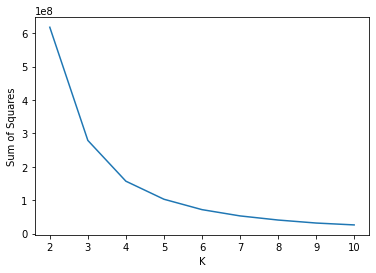

In [ ]:
%matplotlib inline

# plot the elbow plot

data = pd.DataFrame({'K': range(2,11), 
                      'Sum of Squares':ss})

sns.lineplot(data = data, 
             x = 'K', 
             y = 'Sum of Squares')

Text(0.5, 1.0, 'Elbow Plot')

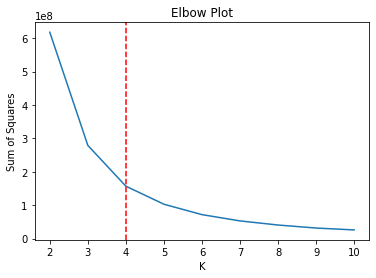

In [ ]:
sns.lineplot(data = data, 
             x = 'K', 
             y = 'Sum of Squares')

plt.axvline(x = 4, color = 'red', linestyle = '--')
plt.title('Elbow Plot')

In [ ]:
model= cluster.KMeans(n_clusters = 4, random_state = 10)
#fit the created k-means model to our data
model.fit(newdf[['z_income', 'z_age', 'member_since', 'male','female']])

newdf['cluster'] = model.labels_
newdf.head(10)

,id,event,value,gender,age,became_member_on,income,member_since,male,female,z_income,z_age,cluster
0,0009655768c64bdeb2e877511632db8f,3,3,M,33,2017-04-21,72000.0,1351,1,0,0.191620,-1.305027,2
1,0011e0d4e6b944f998e987f904e8c1e5,3,3,O,40,2018-01-09,57000.0,1088,0,0,-0.498553,-0.894209,1
2,0020c2b971eb4e9188eac86d93036a77,3,3,F,59,2016-03-04,90000.0,1764,0,1,1.019827,0.220867,0
3,0020ccbbb6d84e358d3414a3ff76cffd,3,3,F,24,2016-11-11,60000.0,1512,0,1,-0.360518,-1.833221,2
4,003d66b6608740288d6cc97a6903f4f0,3,3,F,26,2017-06-21,73000.0,1290,0,1,0.237632,-1.715845,2
5,00426fe3ffde4c6b9cb9ad6d077a13ea,1,1,F,19,2016-08-09,65000.0,1606,0,1,-0.130461,-2.126662,2
6,004b041fbfe44859945daa2c7f79ee64,2,2,F,55,2018-05-08,74000.0,969,0,1,0.283643,-0.013886,1
7,004c5799adbf42868b9cff0396190900,5,5,M,54,2016-03-31,99000.0,1737,1,0,1.433931,-0.072574,0
8,005500a7188546ff8a767329a2f7c76a,1,1,M,56,2017-12-09,47000.0,1119,1,0,-0.958668,0.044802,1
9,0056df74b63b4298809f0b375a304cf4,3,3,M,54,2016-08-21,91000.0,1594,1,0,1.065839,-0.072574,2


In [ ]:
newdf[['income', 'age', 'member_since', 'male', 'female', 'cluster']].groupby('cluster').mean().round(2)

,income,age,member_since,male,female
cluster,,,,,
0,70143.94,56.21,1832.54,0.51,0.47
1,66680.99,54.75,1104.69,0.54,0.45
2,70631.82,56.36,1471.04,0.48,0.51
3,59151.94,51.73,2419.73,0.76,0.23


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

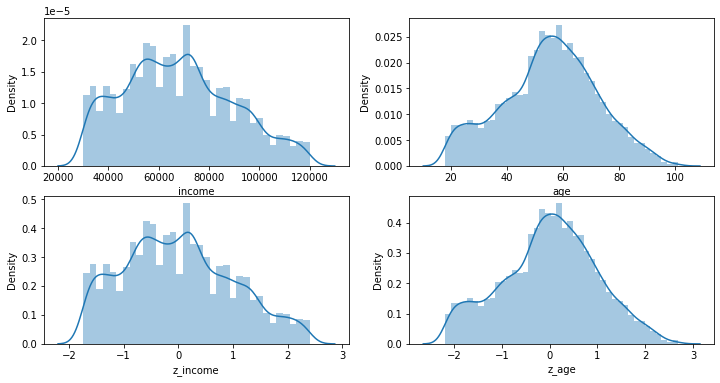

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (12, 6))

sns.distplot(newdf['income'], ax = ax[0,0])
sns.distplot(newdf['age'], ax = ax[0,1])
sns.distplot(newdf['z_income'], ax = ax[1,0])
sns.distplot(newdf['z_age'], ax = ax[1,1])